<a href="https://colab.research.google.com/github/shweta-todgire/Data-Science-Codes/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/diabetes.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [ ]:
#Clean & Pepare the Data
cols_with_zero_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero_missing:
    df[col] = df[col].replace(0, df[col].median())
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


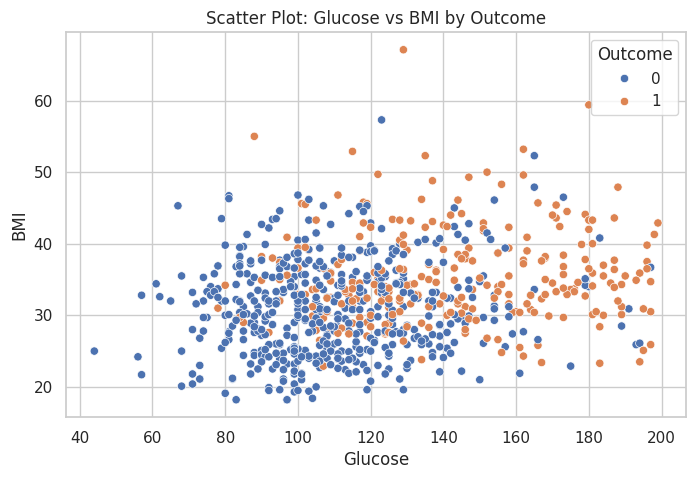

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome')
plt.title("Scatter Plot: Glucose vs BMI by Outcome")
plt.show()

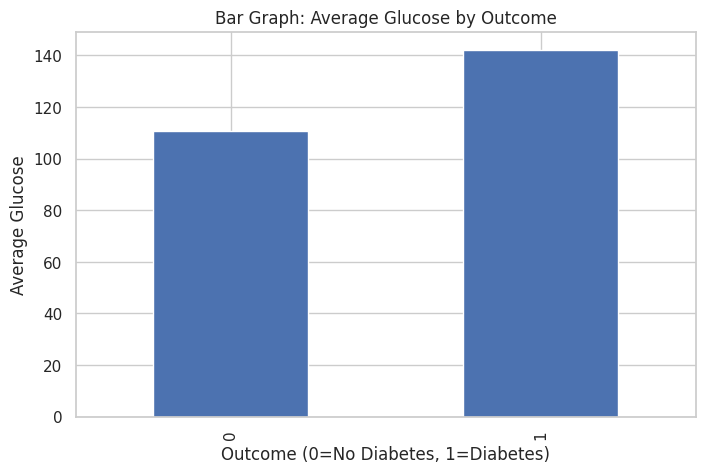

In [ ]:
plt.figure(figsize=(8,5))
df.groupby("Outcome")["Glucose"].mean().plot(kind='bar')
plt.title("Bar Graph: Average Glucose by Outcome")
plt.xlabel("Outcome (0=No Diabetes, 1=Diabetes)")
plt.ylabel("Average Glucose")
plt.show()


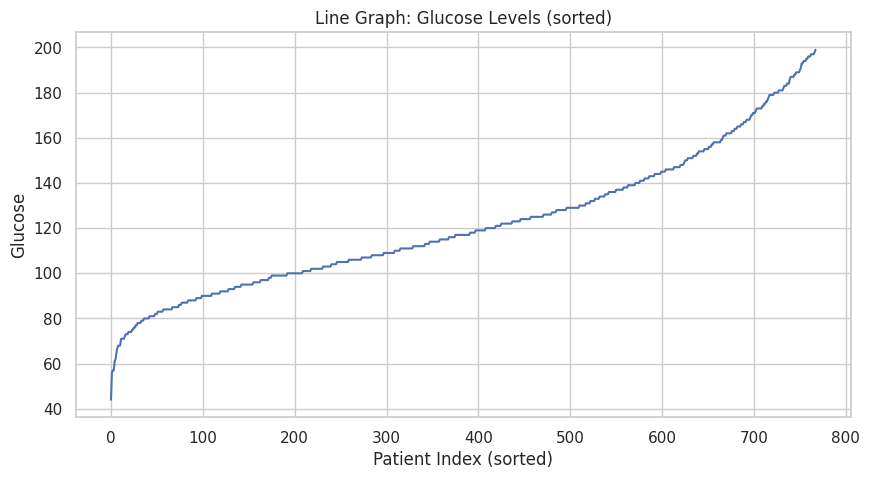

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(sorted(df["Glucose"].values))
plt.title("Line Graph: Glucose Levels (sorted)")
plt.xlabel("Patient Index (sorted)")
plt.ylabel("Glucose")
plt.show()


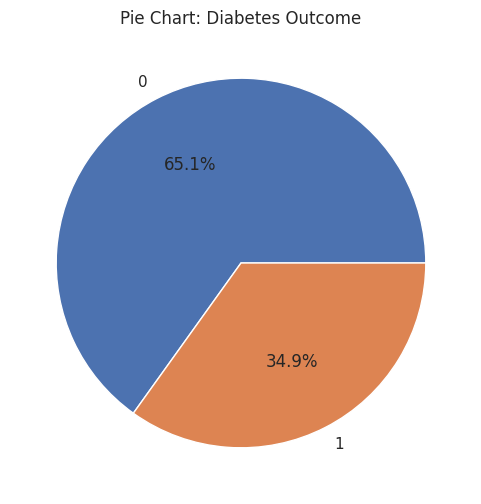

In [ ]:
plt.figure(figsize=(6,6))
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Pie Chart: Diabetes Outcome")
plt.ylabel("")
plt.show()


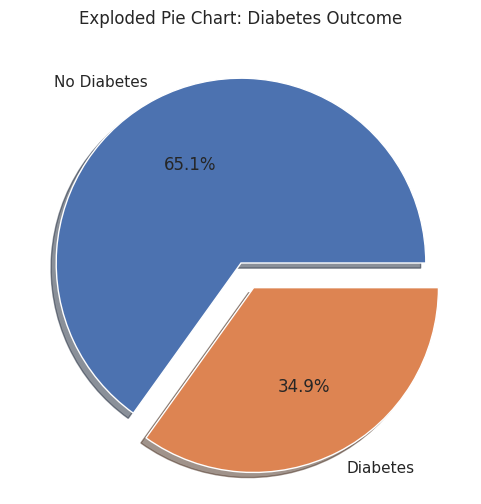

In [ ]:
plt.figure(figsize=(6,6))
values = df['Outcome'].value_counts()
labels = ['No Diabetes', 'Diabetes']
explode = [0, 0.15]  # explode diabetic slice

plt.pie(values, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True)
plt.title("Exploded Pie Chart: Diabetes Outcome")
plt.show()


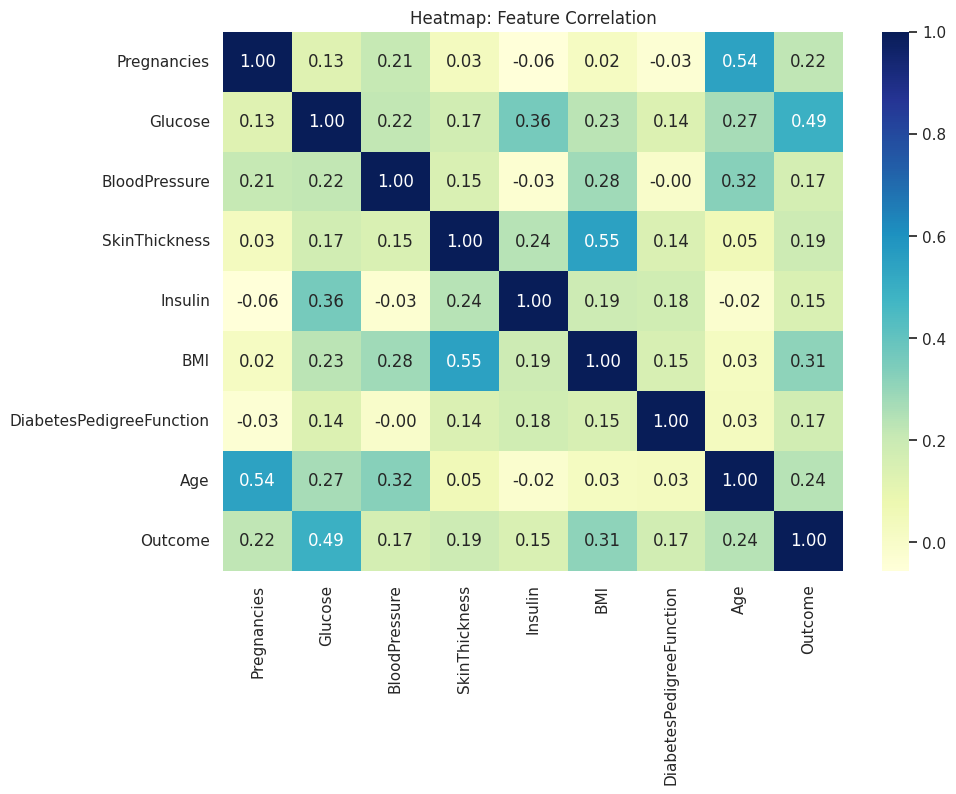

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap: Feature Correlation")
plt.show()


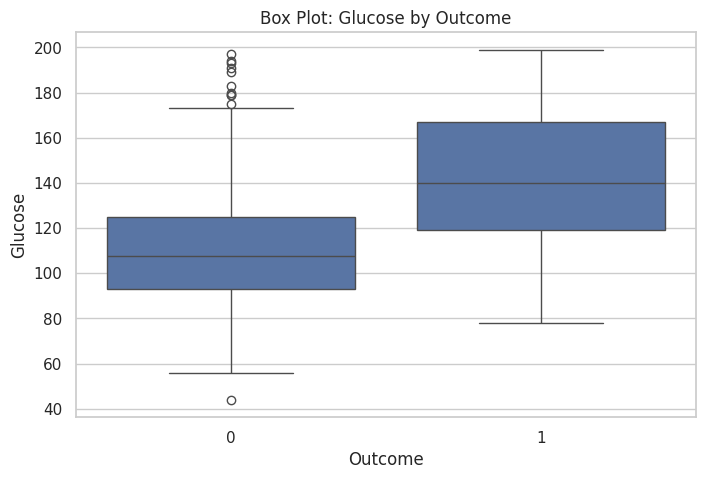

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Box Plot: Glucose by Outcome")
plt.show()


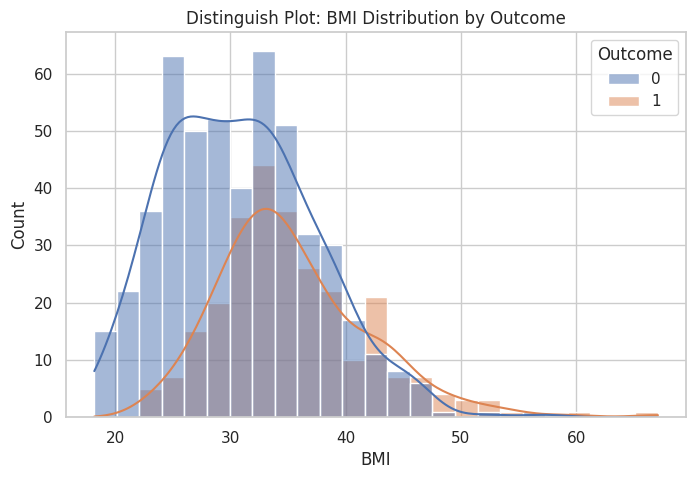

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='BMI', hue='Outcome', kde=True)
plt.title("Distinguish Plot: BMI Distribution by Outcome")
plt.show()


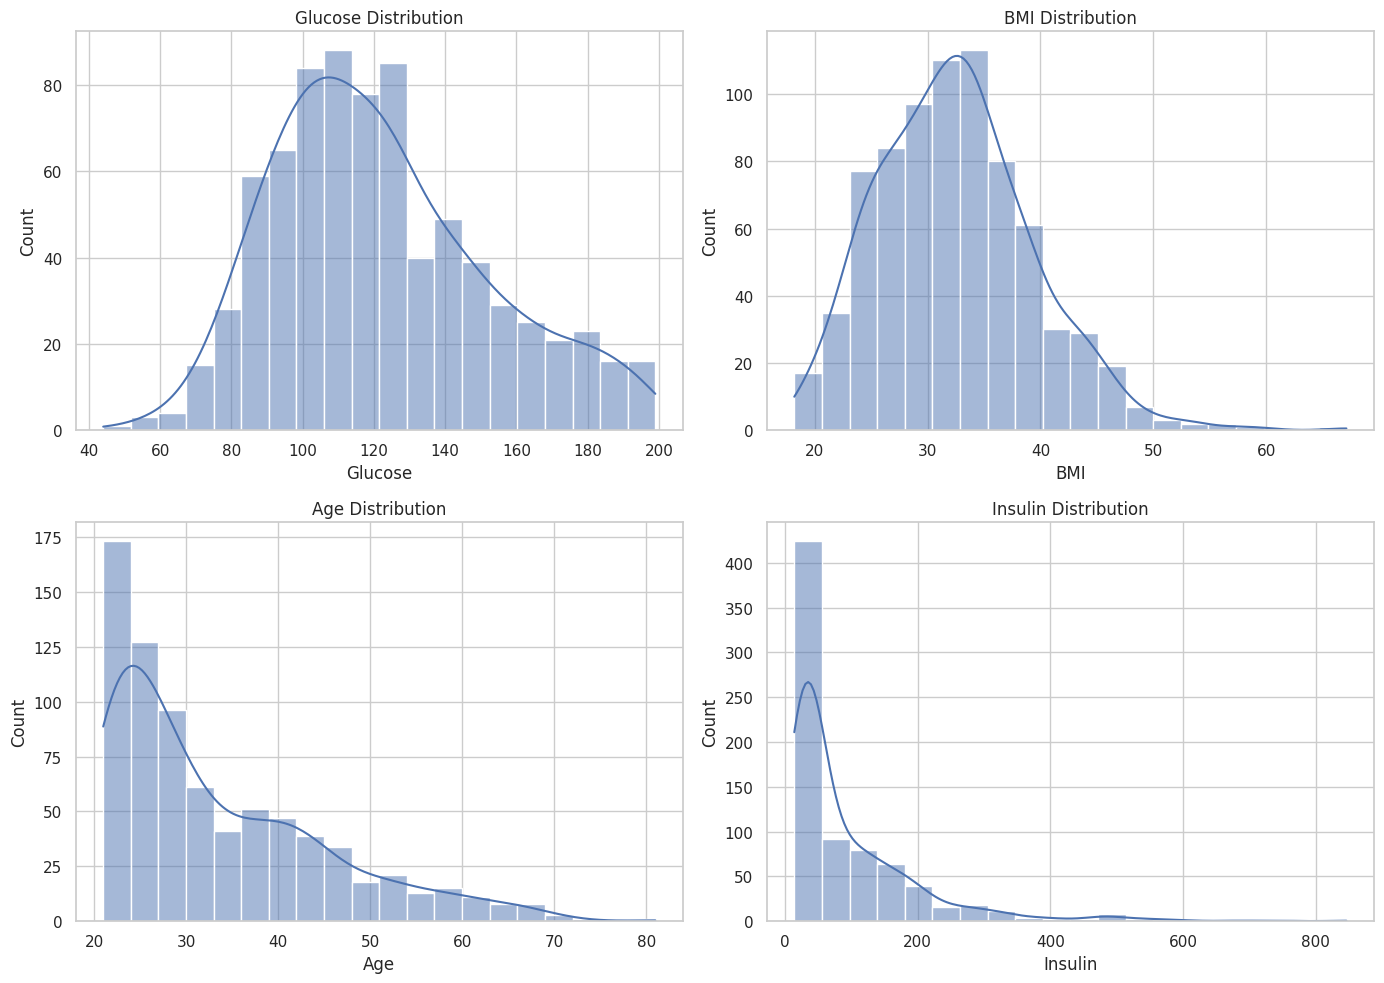

In [ ]:
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.histplot(df['Glucose'], kde=True, bins=20)
plt.title("Glucose Distribution")

plt.subplot(2,2,2)
sns.histplot(df['BMI'], kde=True, bins=20)
plt.title("BMI Distribution")

plt.subplot(2,2,3)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Age Distribution")

plt.subplot(2,2,4)
sns.histplot(df['Insulin'], kde=True, bins=20)
plt.title("Insulin Distribution")

plt.tight_layout()
plt.show()
